<a href="https://colab.research.google.com/github/JemaaHela/INSE6220/blob/main/classification_using_handcrafted_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret==2.3.6


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.5/301.5 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━

In [2]:

#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)
     

Pandas version:  1.3.5
Seaborn version:  0.11.2


In [5]:
df_help= pd.read_csv('tree_name_type.csv',header=0)
print(len(df_help))
df_help.tree_id=df_help.tree_id.str.replace('.jpg','')
df_help.tree_id=df_help.tree_id.apply(lambda x:x.split('_')[0])
print("Number of duplicated rows is: ", df_help['tree_id'].duplicated().sum())
df_help

2827
Number of duplicated rows is:  0


<ipython-input-5-0b28ce0a82a8>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_help.tree_id=df_help.tree_id.str.replace('.jpg','')


tree_id     type_status
0        B10   train_healthy
1       B100   train_healthy
2      B1000   train_healthy
3      B1001   train_healthy
4      B1002   train_healthy
...      ...             ...
2822   A0561  test_unhealthy
2823   A0564  test_unhealthy
2824   A0659  test_unhealthy
2825   A1033  test_unhealthy
2826   A1383  test_unhealthy

[2827 rows x 2 columns]

In [6]:

hand_features_df = pd.read_csv('data.csv')
hand_features_df = hand_features_df[['tree_id','DVI', 'GDVI', 'GNDVI','GRVI', 'NDAVI', 'NDVI', 'NG', 'NR', 'NNIR', 'RVI', 'WAVI']]
hand_features_df

tree_id         DVI        GDVI       GNDVI       GRVI       NDAVI  \
0      A0101  126.403804  122.965217  200.594022  27.879348  231.486413   
1      A0102  120.242310  117.940155  201.037665  28.414313  229.794727   
2      A0103   91.938447   92.802399  204.172348  31.999369  225.944760   
3      A0104  106.326471  106.461765  199.616667  27.900327  223.971895   
4      A0105  106.559474  106.450000  201.535263  28.915263  226.238421   
...      ...         ...         ...         ...        ...         ...   
3204   D0627  100.160200  101.183563  195.459741  25.476429  217.909887   
3205   D0626   94.041077   97.047811  188.762290  22.711111  210.074411   
3206   D0701   94.402296   98.469898  187.536990  22.018622  209.637500   
3207   D0702   99.158872  100.688284  188.813163  22.471794  214.545323   
3208   D0703   89.371468   92.307813  187.605511  21.995640  208.707185   

            NDVI         NG         NR        NNIR       RVI        WAVI  
0     226.317391  53.663587  31.189674  193.687500  9.239130  183.587500  
1     223.062984  52.749738  34.722955  192.097510  8.835740  176.998117  
2     217.141098  48.616162  41.501578  191.170770  8.382576  147.550189  
3     213.721895  52.899673  45.219608  185.411765  7.213072  163.416993  
4     217.474211  51.477368  41.323684  189.060526  7.519474  164.394211  
...          ...        ...        ...         ...       ...         ...  
3204  205.980392  56.138506  53.610763  177.450980  5.324572  157.912390  
3205  190.757239  60.330640  69.840067  163.775084  3.940067  152.157576  
3206  186.504592  61.042092  74.454082  160.302041  3.421684  153.912755  
3207  195.760608  61.184908  64.392719  166.620540  4.331003  157.171408  
3208  189.365713  61.414719  71.245378  162.036624  3.572550  145.011161  

[3209 rows x 12 columns]

In [7]:
hand_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tree_id  3209 non-null   object 
 1   DVI      3209 non-null   float64
 2   GDVI     3209 non-null   float64
 3   GNDVI    3209 non-null   float64
 4   GRVI     3209 non-null   float64
 5   NDAVI    3209 non-null   float64
 6   NDVI     3209 non-null   float64
 7   NG       3209 non-null   float64
 8   NR       3209 non-null   float64
 9   NNIR     3209 non-null   float64
 10  RVI      3209 non-null   float64
 11  WAVI     3209 non-null   float64
dtypes: float64(11), object(1)
memory usage: 301.0+ KB


In [8]:
print("Number of duplicated rows is: ", hand_features_df.duplicated().sum())

Number of duplicated rows is:  0


In [9]:
print("Number of rows with NaNs is: ", hand_features_df.isna().any(axis=1).sum())


Number of rows with NaNs is:  0


In [10]:

df = pd.merge(hand_features_df, df_help, on='tree_id', how='inner')
df['class']=df['type_status'].apply(lambda x:x.split('_')[1])
df['class']=df['class'].apply(lambda x:0 if x=='healthy' else 1)
df['data_type']=df['type_status'].apply(lambda x:x.split('_')[0])
df=df.drop(columns=['type_status','tree_id'])
df.columns

Index(['DVI', 'GDVI', 'GNDVI', 'GRVI', 'NDAVI', 'NDVI', 'NG', 'NR', 'NNIR',
       'RVI', 'WAVI', 'class', 'data_type'],
      dtype='object')

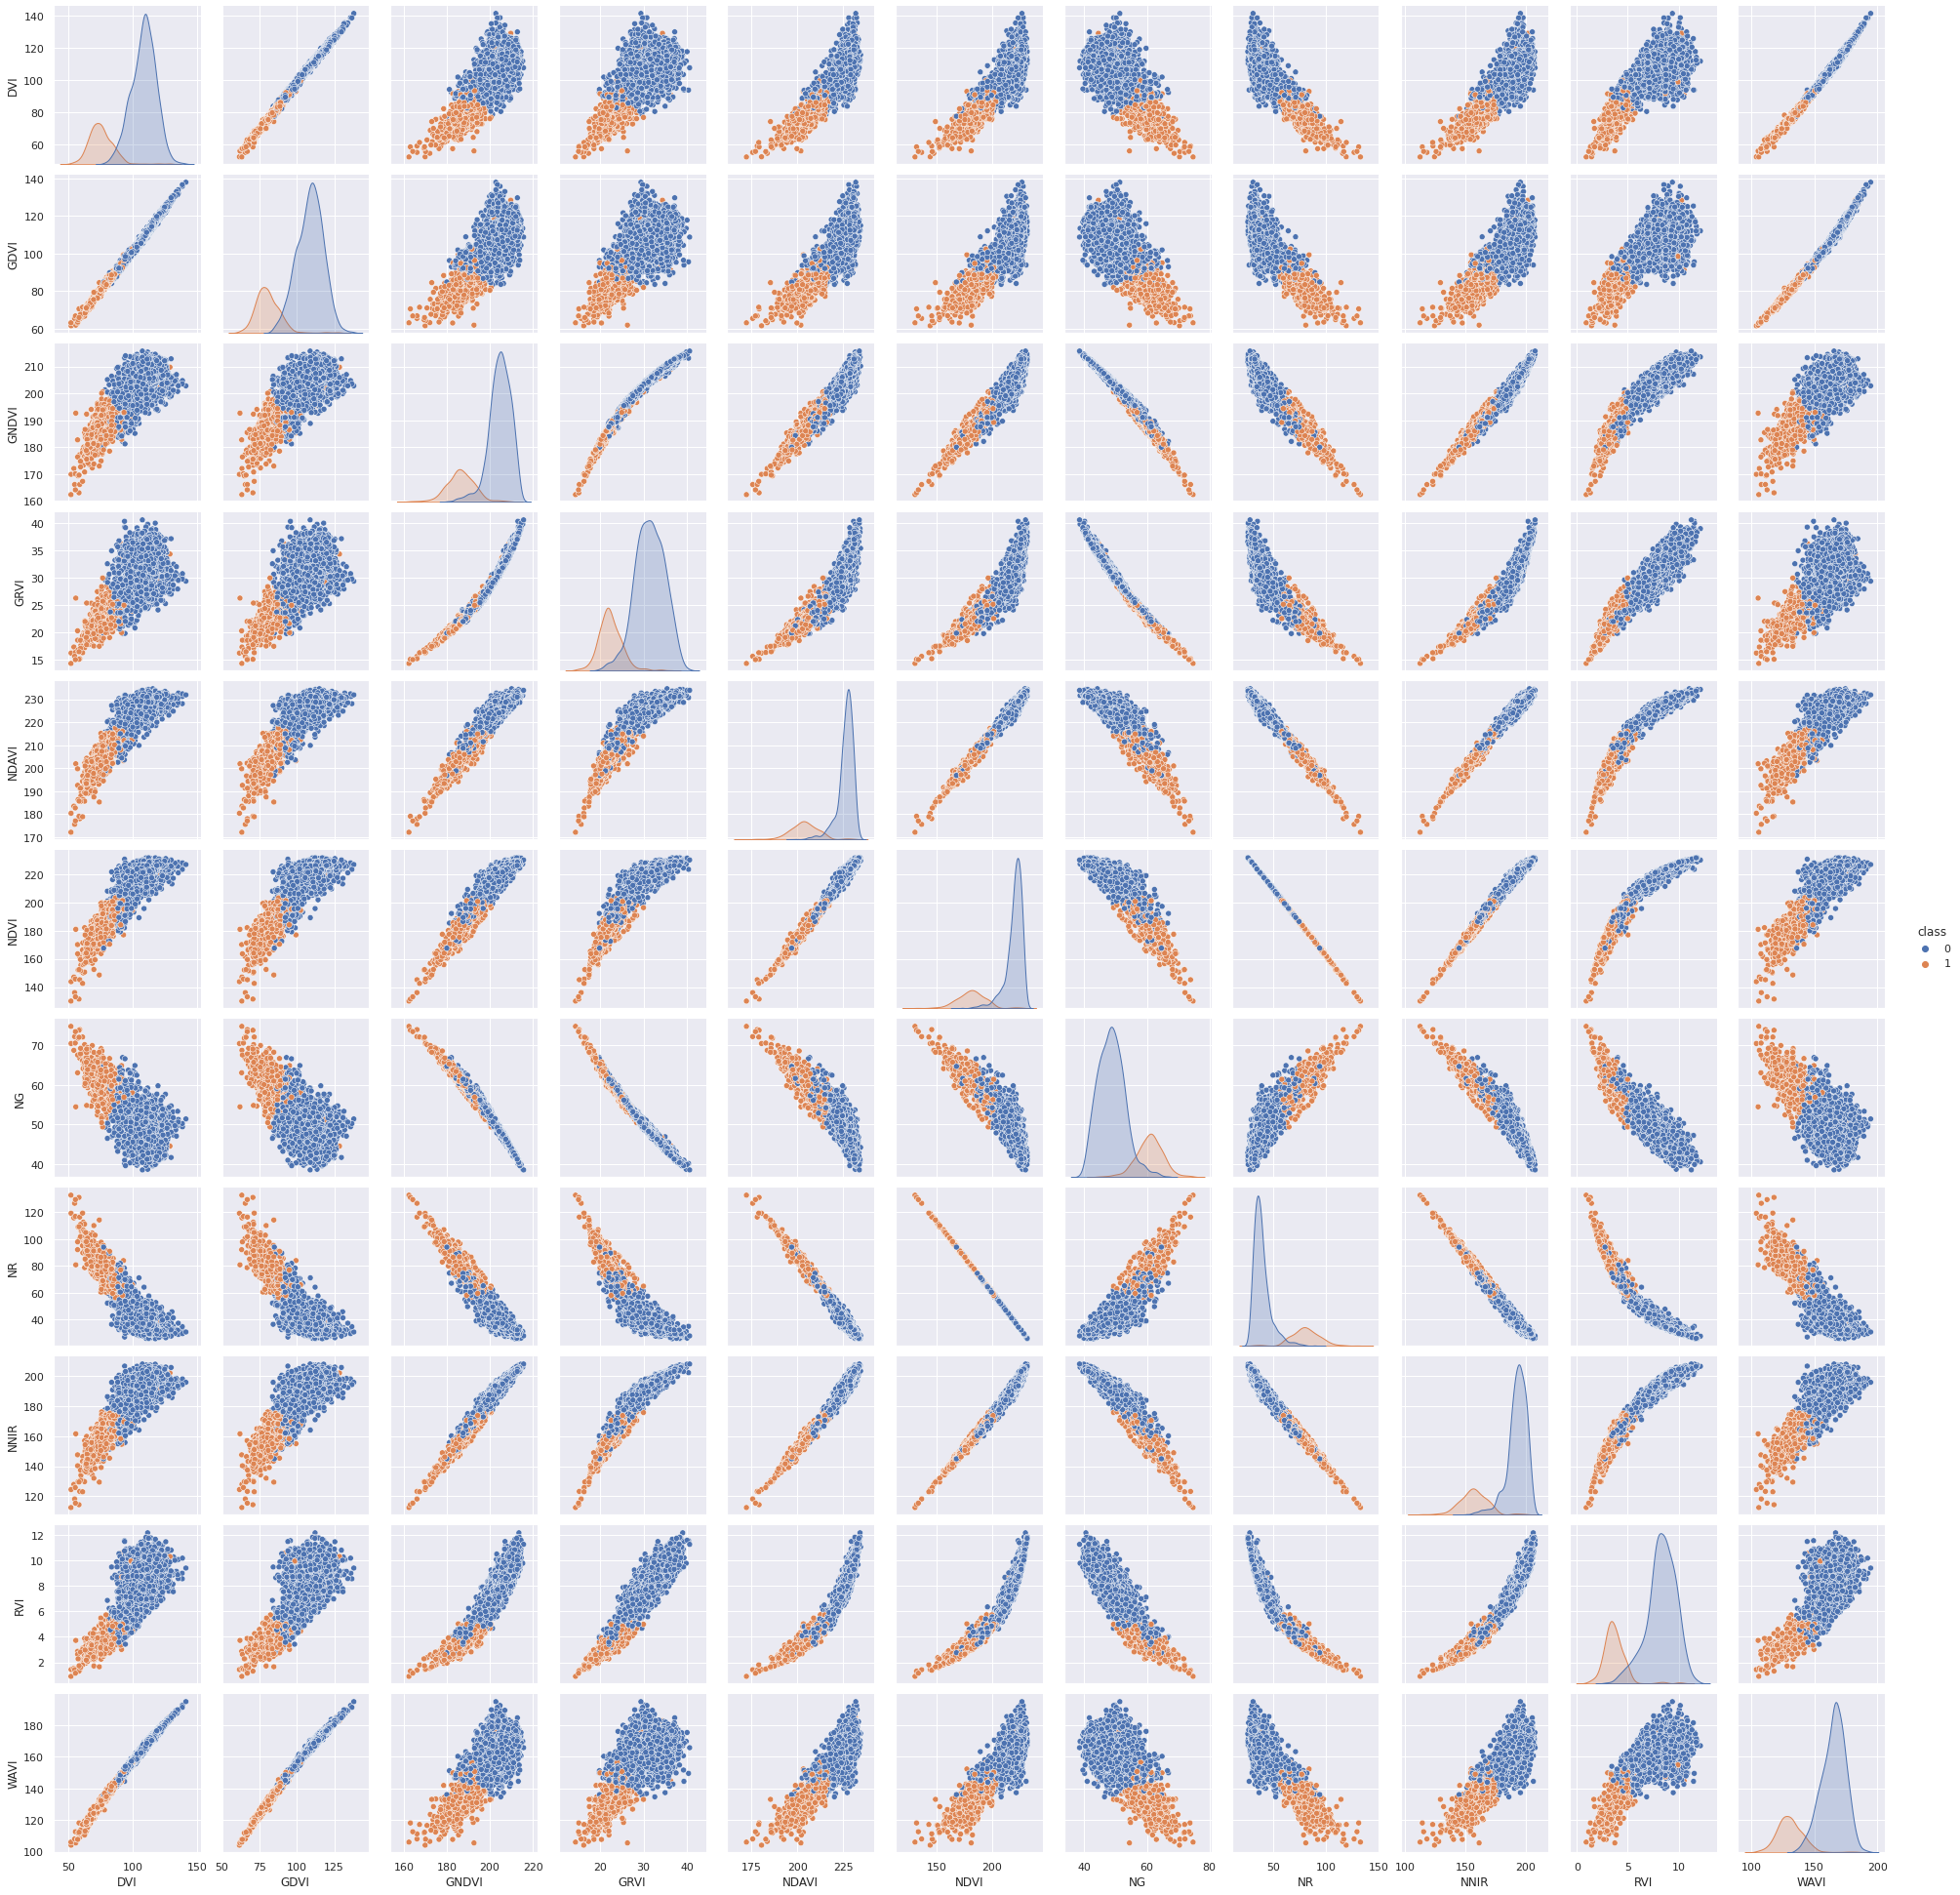

In [11]:
sns.pairplot(df, hue='class')
plt.show()

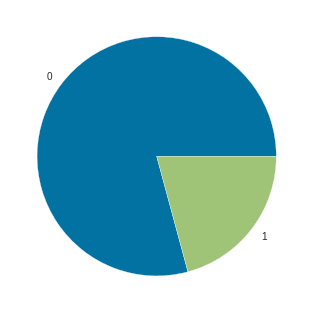

In [102]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [103]:
X = df.drop(columns=['class'])
X

DVI        GDVI       GNDVI       GRVI       NDAVI        NDVI  \
0     126.403804  122.965217  200.594022  27.879348  231.486413  226.317391   
1     120.242310  117.940155  201.037665  28.414313  229.794727  223.062984   
2      91.938447   92.802399  204.172348  31.999369  225.944760  217.141098   
3     106.326471  106.461765  199.616667  27.900327  223.971895  213.721895   
4     106.559474  106.450000  201.535263  28.915263  226.238421  217.474211   
...          ...         ...         ...        ...         ...         ...   
2823  100.160200  101.183563  195.459741  25.476429  217.909887  205.980392   
2824   94.041077   97.047811  188.762290  22.711111  210.074411  190.757239   
2825   94.402296   98.469898  187.536990  22.018622  209.637500  186.504592   
2826   99.158872  100.688284  188.813163  22.471794  214.545323  195.760608   
2827   89.371468   92.307813  187.605511  21.995640  208.707185  189.365713   

             NG         NR        NNIR       RVI        WAVI data_type  
0     53.663587  31.189674  193.687500  9.239130  183.587500      test  
1     52.749738  34.722955  192.097510  8.835740  176.998117      test  
2     48.616162  41.501578  191.170770  8.382576  147.550189      test  
3     52.899673  45.219608  185.411765  7.213072  163.416993      test  
4     51.477368  41.323684  189.060526  7.519474  164.394211      test  
...         ...        ...         ...       ...         ...       ...  
2823  56.138506  53.610763  177.450980  5.324572  157.912390       val  
2824  60.330640  69.840067  163.775084  3.940067  152.157576       val  
2825  61.042092  74.454082  160.302041  3.421684  153.912755     train  
2826  61.184908  64.392719  166.620540  4.331003  157.171408     train  
2827  61.414719  71.245378  162.036624  3.572550  145.011161     train  

[2828 rows x 12 columns]

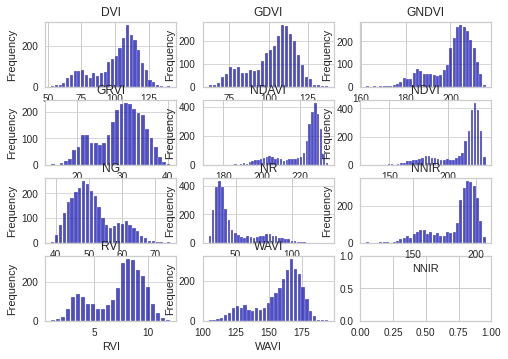

In [104]:
dvi = X['DVI']
gdvi = X['GDVI']
gndvi = X['GNDVI']
grvi = X['GRVI']
ndavi = X['NDAVI']

ndvi = X['NDVI']
ng = X['NG']
nr = X['NR']
nnir = X['NNIR']
rvi = X['RVI']
wavi = X['WAVI']

feature_names = ['DVI','GDVI','GNDVI','GRVI','NDAVI','NDVI','NG','NR','NNIR','RVI','WAVI']
features = [dvi,gdvi,gndvi,grvi,ndavi,ndvi,ng,nr,nnir,rvi,wavi]
fig, axs = plt.subplots(4, 3)
for i in range(1,12):
    plt.subplot(4, 3, i)
    n, bins, patches = plt.hist(x=features[i-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel(str(feature_names[i-1]))
    plt.ylabel('Frequency')
    plt.title(str(feature_names[i-1]))

     


In [105]:
X.describe().transpose()

count        mean        std         min         25%         50%  \
DVI    2828.0  101.551189  16.438738   52.181224   92.913170  106.086684   
GDVI   2828.0  102.778563  14.346482   61.633170   94.626186  106.297419   
GNDVI  2828.0  200.774019   9.214183  162.369796  196.874234  203.312285   
GRVI   2828.0   29.518908   4.949425   14.302857   26.455917   30.257921   
NDAVI  2828.0  221.501185  10.653476  172.181224  217.997019  225.970395   
NDVI   2828.0  211.499486  18.276131  130.139592  205.103293  219.439303   
NG     2828.0   51.135519   6.587564   38.481818   46.263618   49.856775   
NR     2828.0   47.633707  19.486447   25.764456   34.423372   39.112979   
NNIR   2828.0  185.273859  17.280355  112.500408  178.062089  191.626447   
RVI    2828.0    7.322101   2.332299    0.902857    5.668278    7.954780   
WAVI   2828.0  157.961798  17.008386  104.091503  149.459147  162.886718   

              75%         max  
DVI    113.257949  141.386982  
GDVI   113.230170  138.030473  
GNDVI  207.360894  215.729966  
GRVI    33.245144   40.653872  
NDAVI  228.550456  234.554674  
NDVI   223.838688  231.774086  
NG      54.710641   74.781224  
NR      54.647578  132.648163  
NNIR   197.226750  207.937037  
RVI      9.049179   12.151296  
WAVI   170.163312  194.779290

In [106]:

Xs = StandardScaler().fit_transform(X[feature_names])

X = pd.DataFrame(Xs)
X.columns = feature_names
X.head(10)

DVI      GDVI     GNDVI      GRVI     NDAVI      NDVI        NG  \
0  1.512100  1.407329 -0.019538 -0.331321  0.937440  0.810922  0.383832   
1  1.137218  1.057003  0.028618 -0.223216  0.778620  0.632822  0.245084   
2 -0.584865 -0.695497  0.368880  0.501250  0.417175  0.308742 -0.382509   
3  0.290541  0.256777 -0.125628 -0.327082  0.231957  0.121623  0.267848   
4  0.304717  0.255957  0.082631 -0.121984  0.444744  0.326972  0.051902   
5 -0.442362 -0.554443  0.602691  0.851388  0.571305  0.523560 -0.630747   
6 -0.505353 -0.619970  0.592471  0.887338  0.492205  0.463911 -0.669620   
7  0.346672  0.173145 -0.049741 -0.306005  0.532180  0.642022  0.356124   
8  0.470606  0.349493 -0.055072 -0.316814  0.516777  0.500625  0.325351   
9  0.306630  0.247060  0.356928  0.264535  0.671610  0.547555 -0.268384   

         NR      NNIR       RVI      WAVI  
0 -0.844020  0.486977  0.822094  1.506917  
1 -0.662668  0.394949  0.649105  1.119429  
2 -0.314743  0.341310  0.454771 -0.612254  
3 -0.123908  0.007982 -0.046756  0.320792  
4 -0.323873  0.219170  0.084641  0.378258  
5 -0.531212  0.571103  0.883605 -0.421949  
6 -0.471632  0.542814  0.870273 -0.559028  
7 -0.670576  0.367801  0.575111  0.415945  
8 -0.513423  0.272472  0.374689  0.560314  
9 -0.553403  0.476893  0.749984  0.408987

[Text(0, 0, 'DVI'),
 Text(0, 0, 'GDVI'),
 Text(0, 0, 'GNDVI'),
 Text(0, 0, 'GRVI'),
 Text(0, 0, 'NDAVI'),
 Text(0, 0, 'NDVI'),
 Text(0, 0, 'NG'),
 Text(0, 0, 'NR'),
 Text(0, 0, 'NNIR'),
 Text(0, 0, 'RVI'),
 Text(0, 0, 'WAVI')]

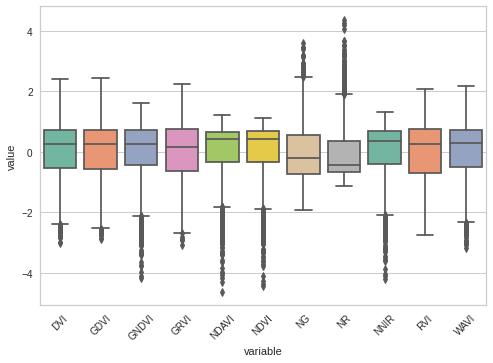

In [107]:
ax = plt.figure()
X_melt = X.melt()
ax = sns.boxplot(data=X_melt, x='variable', y='value', orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)



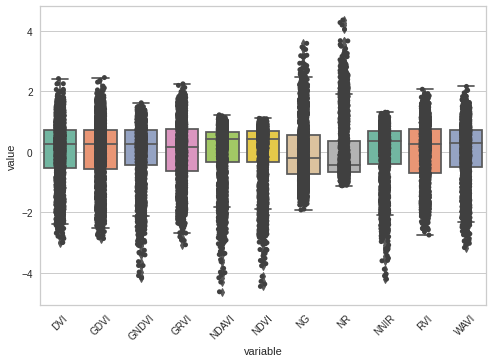

In [108]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X_melt, x='variable', y='value', orient="v", palette="Set2")

ax = sns.stripplot(data=X_melt, x='variable', y='value', color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

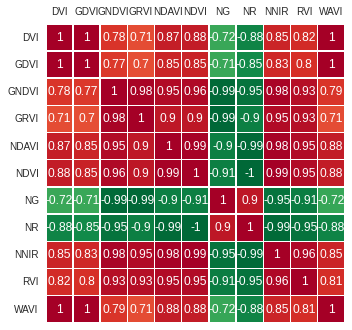

In [109]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')
     

Text(0, 0.5, 'Z2')

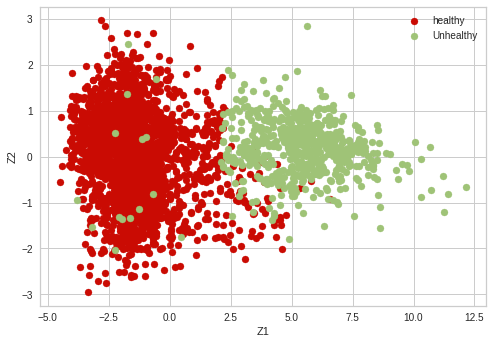

In [110]:

pca = PCA()
Z = pca.fit_transform(X)

# 1(non_occupied)->0,  2(occupied)->1, 
idx_healthy = np.where(y == 0)
idx_unhealthy = np.where(y == 1)


plt. figure()
plt.scatter(Z[idx_healthy,0], Z[idx_healthy,1], c='r', label='healthy')
plt.scatter(Z[idx_unhealthy,0], Z[idx_unhealthy,1], c='g', label='Unhealthy')

plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

In [111]:
observations = list(df.index)
variables = list(df.columns)

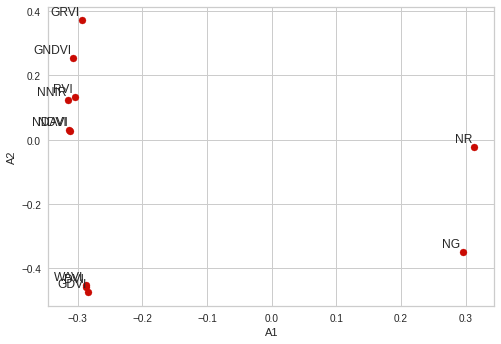

In [112]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

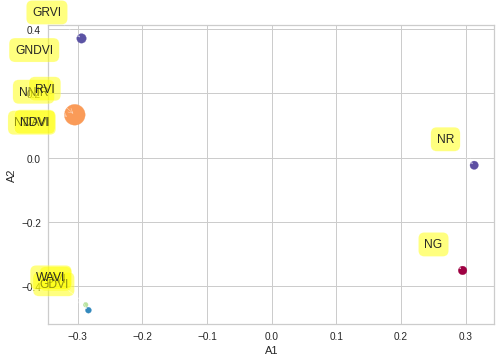

In [113]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0, 0.5, 'Explained variance')

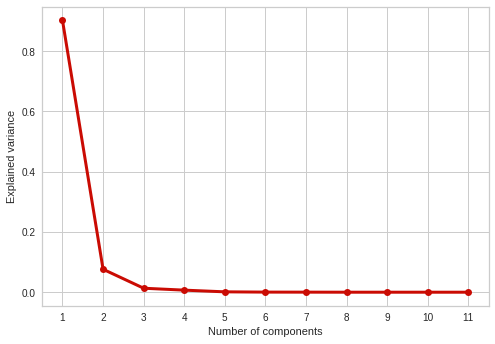

In [114]:

#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

Text(0, 0.5, 'Cumulative explained variance')

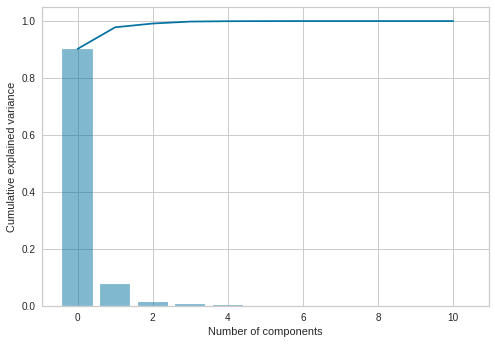

In [115]:

ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

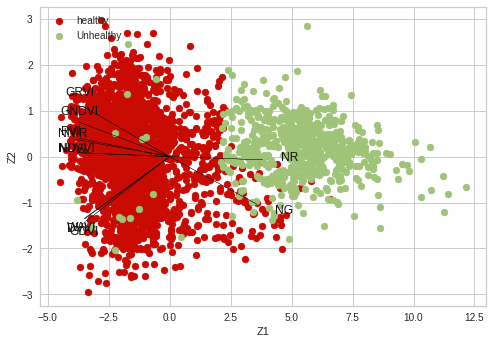

In [116]:

# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')
plt.scatter(Z[idx_healthy,0], Z[idx_healthy,1], c='r', label='healthy')
plt.scatter(Z[idx_unhealthy,0], Z[idx_unhealthy,1], c='g', label='Unhealthy')
plt.legend(loc='upper left')
     

**CLASSIFICATION**

In [117]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()
     

Colab mode enabled.


**Data split to train val and test**

In [118]:
df

DVI        GDVI       GNDVI       GRVI       NDAVI        NDVI  \
0     126.403804  122.965217  200.594022  27.879348  231.486413  226.317391   
1     120.242310  117.940155  201.037665  28.414313  229.794727  223.062984   
2      91.938447   92.802399  204.172348  31.999369  225.944760  217.141098   
3     106.326471  106.461765  199.616667  27.900327  223.971895  213.721895   
4     106.559474  106.450000  201.535263  28.915263  226.238421  217.474211   
...          ...         ...         ...        ...         ...         ...   
2823  100.160200  101.183563  195.459741  25.476429  217.909887  205.980392   
2824   94.041077   97.047811  188.762290  22.711111  210.074411  190.757239   
2825   94.402296   98.469898  187.536990  22.018622  209.637500  186.504592   
2826   99.158872  100.688284  188.813163  22.471794  214.545323  195.760608   
2827   89.371468   92.307813  187.605511  21.995640  208.707185  189.365713   

             NG         NR        NNIR       RVI        WAVI  class data_type  
0     53.663587  31.189674  193.687500  9.239130  183.587500      0      test  
1     52.749738  34.722955  192.097510  8.835740  176.998117      0      test  
2     48.616162  41.501578  191.170770  8.382576  147.550189      0      test  
3     52.899673  45.219608  185.411765  7.213072  163.416993      0      test  
4     51.477368  41.323684  189.060526  7.519474  164.394211      0      test  
...         ...        ...         ...       ...         ...    ...       ...  
2823  56.138506  53.610763  177.450980  5.324572  157.912390      0       val  
2824  60.330640  69.840067  163.775084  3.940067  152.157576      0       val  
2825  61.042092  74.454082  160.302041  3.421684  153.912755      0     train  
2826  61.184908  64.392719  166.620540  4.331003  157.171408      0     train  
2827  61.414719  71.245378  162.036624  3.572550  145.011161      0     train  

[2828 rows x 13 columns]

In [119]:
X_with_class = pd.concat([X,df['class']],axis=1)
X_with_class

DVI      GDVI     GNDVI      GRVI     NDAVI      NDVI        NG  \
0     1.512100  1.407329 -0.019538 -0.331321  0.937440  0.810922  0.383832   
1     1.137218  1.057003  0.028618 -0.223216  0.778620  0.632822  0.245084   
2    -0.584865 -0.695497  0.368880  0.501250  0.417175  0.308742 -0.382509   
3     0.290541  0.256777 -0.125628 -0.327082  0.231957  0.121623  0.267848   
4     0.304717  0.255957  0.082631 -0.121984  0.444744  0.326972  0.051902   
...        ...       ...       ...       ...       ...       ...       ...   
2823 -0.084631 -0.111197 -0.576852 -0.816902 -0.337161 -0.302037  0.759594   
2824 -0.456935 -0.399524 -1.303844 -1.375716 -1.072776 -1.135137  1.396077   
2825 -0.434958 -0.300382 -1.436847 -1.515653 -1.113795 -1.367867  1.504095   
2826 -0.145555 -0.145726 -1.298321 -1.424077 -0.653035 -0.861324  1.525779   
2827 -0.741047 -0.729977 -1.429409 -1.520298 -1.201135 -1.211290  1.560671   

            NR      NNIR       RVI      WAVI  class  
0    -0.844020  0.486977  0.822094  1.506917      0  
1    -0.662668  0.394949  0.649105  1.119429      0  
2    -0.314743  0.341310  0.454771 -0.612254      0  
3    -0.123908  0.007982 -0.046756  0.320792      0  
4    -0.323873  0.219170  0.084641  0.378258      0  
...        ...       ...       ...       ...    ...  
2823  0.306783 -0.452784 -0.856615 -0.002905      0  
2824  1.139781 -1.244336 -1.450342 -0.341317      0  
2825  1.376604 -1.445354 -1.672644 -0.238104      0  
2826  0.860186 -1.079643 -1.282694 -0.046479      0  
2827  1.211911 -1.344958 -1.607947 -0.761561      0  

[2828 rows x 12 columns]

In [120]:
train_indices = df.loc[df['data_type']=='train'].index
val_indices = df.loc[df['data_type']=='val'].index
test_indices = df.loc[df['data_type']=='test'].index
X_train = X_with_class.iloc[train_indices]
X_val = X_with_class.iloc[val_indices]
X_test = X_with_class.iloc[test_indices]
print(len(X_train))
print(len(X_val))
print(len(X_test))


1344
337
1147


In [121]:
import copy
data = pd.concat([X_train, X_val])
data_unseen = copy.deepcopy(X_test)

In [124]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data        (1681, 12)
5                           Missing Values             False
6                         Numeric Features                11
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (1176, 6)
12                    Transformed Test Set          (505, 6)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              b454
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [125]:
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.9558  0.9885  0.9563  0.9168   
nb                            Naive Bayes    0.9507  0.9854  0.9744  0.8912   
gbc          Gradient Boosting Classifier    0.9507  0.9864  0.9486  0.9094   
lightgbm  Light Gradient Boosting Machine    0.9490  0.9869  0.9358  0.9149   
ada                  Ada Boost Classifier    0.9473  0.9840  0.9333  0.9122   
et                 Extra Trees Classifier    0.9464  0.9873  0.9383  0.9070   
lr                    Logistic Regression    0.9456  0.9892  0.9229  0.9161   
knn                K Neighbors Classifier    0.9455  0.9814  0.9408  0.9028   
ridge                    Ridge Classifier    0.9447  0.0000  0.9203  0.9154   
qda       Quadratic Discriminant Analysis    0.9439  0.9843  0.9589  0.8862   
lda          Linear Discriminant Analysis    0.9439  0.9888  0.9254  0.9100   
dt               Decision Tree Classifier    0.9371  0.9270  0.8972  0.9135   
svm                   SVM - Linear Kernel    0.9244  0.0000  0.8844  0.8991   
dummy                    Dummy Classifier    0.6692  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
rf        0.9350  0.9016  0.9033     0.236  
nb        0.9295  0.8918  0.8956     0.012  
gbc       0.9276  0.8902  0.8918     0.204  
lightgbm  0.9242  0.8858  0.8871     0.143  
ada       0.9216  0.8820  0.8832     0.118  
et        0.9211  0.8806  0.8824     0.178  
lr        0.9184  0.8776  0.8788     0.421  
knn       0.9202  0.8790  0.8808     0.022  
ridge     0.9168  0.8754  0.8766     0.012  
qda       0.9195  0.8767  0.8802     0.013  
lda       0.9161  0.8740  0.8758     0.012  
dt        0.9048  0.8578  0.8584     0.013  
svm       0.8673  0.8192  0.8337     0.013  
dummy     0.0000  0.0000  0.0000     0.013

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [127]:
#tune the best model

# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9576  0.9734  1.0000  0.8864  0.9398  0.9073  0.9112
1       0.9661  0.9847  0.9487  0.9487  0.9487  0.9234  0.9234
2       0.9746  0.9796  1.0000  0.9286  0.9630  0.9436  0.9452
3       0.9746  0.9901  0.9744  0.9500  0.9620  0.9429  0.9431
4       0.9153  0.9518  0.9744  0.8085  0.8837  0.8180  0.8268
5       0.9661  0.9758  0.9744  0.9268  0.9500  0.9244  0.9250
6       0.9402  0.9547  1.0000  0.8444  0.9157  0.8698  0.8773
7       0.9744  0.9905  0.9744  0.9500  0.9620  0.9427  0.9428
8       0.9487  0.9714  0.9744  0.8837  0.9268  0.8875  0.8900
9       0.9487  0.9778  0.9487  0.9024  0.9250  0.8861  0.8867
Mean    0.9566  0.9750  0.9769  0.9030  0.9377  0.9046  0.9071
SD      0.0180  0.0125  0.0179  0.0455  0.0240  0.0381  0.0356

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=7, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.3, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [128]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=7, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.3, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

***CLASSIFICATION WITH PCA***

In [129]:


clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data        (1681, 12)
5                           Missing Values             False
6                         Numeric Features                11
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (1176, 3)
12                    Transformed Test Set          (505, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              e30a
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

In [130]:
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.9745  0.9962  0.9666  0.9575   
rf               Random Forest Classifier    0.9728  0.9968  0.9640  0.9560   
ada                  Ada Boost Classifier    0.9719  0.9957  0.9640  0.9534   
gbc          Gradient Boosting Classifier    0.9711  0.9965  0.9666  0.9481   
et                 Extra Trees Classifier    0.9703  0.9963  0.9640  0.9483   
knn                K Neighbors Classifier    0.9685  0.9910  0.9588  0.9490   
dt               Decision Tree Classifier    0.9626  0.9584  0.9461  0.9430   
svm                   SVM - Linear Kernel    0.9618  0.0000  0.9457  0.9417   
qda       Quadratic Discriminant Analysis    0.9601  0.9922  0.9537  0.9313   
lr                    Logistic Regression    0.9592  0.9947  0.9408  0.9383   
nb                            Naive Bayes    0.9592  0.9933  0.9538  0.9293   
lda          Linear Discriminant Analysis    0.9549  0.9930  0.9305  0.9357   
ridge                    Ridge Classifier    0.9541  0.0000  0.9279  0.9355   
dummy                    Dummy Classifier    0.6692  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.9616  0.9425  0.9430     0.063  
rf        0.9592  0.9388  0.9398     0.232  
ada       0.9581  0.9370  0.9377     0.108  
gbc       0.9568  0.9351  0.9357     0.140  
et        0.9555  0.9332  0.9340     0.189  
knn       0.9529  0.9293  0.9304     0.043  
dt        0.9437  0.9157  0.9166     0.015  
svm       0.9418  0.9134  0.9154     0.013  
qda       0.9410  0.9109  0.9125     0.012  
lr        0.9384  0.9079  0.9092     0.027  
nb        0.9398  0.9090  0.9110     0.019  
lda       0.9316  0.8980  0.8997     0.013  
ridge     0.9300  0.8959  0.8977     0.011  
dummy     0.0000  0.0000  0.0000     0.021

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [131]:
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9831  0.9951  1.0000  0.9512  0.9750  0.9622  0.9629
1       0.9661  0.9984  0.9487  0.9487  0.9487  0.9234  0.9234
2       0.9661  0.9958  0.9744  0.9268  0.9500  0.9244  0.9250
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9492  0.9964  0.9744  0.8837  0.9268  0.8880  0.8905
5       0.9915  0.9958  1.0000  0.9750  0.9873  0.9810  0.9812
6       0.9573  0.9927  0.9737  0.9024  0.9367  0.9045  0.9060
7       0.9915  0.9997  1.0000  0.9750  0.9873  0.9809  0.9811
8       0.9744  0.9990  0.9487  0.9737  0.9610  0.9419  0.9421
9       0.9829  0.9987  0.9744  0.9744  0.9744  0.9615  0.9615
Mean    0.9762  0.9972  0.9794  0.9511  0.9647  0.9468  0.9474
SD      0.0156  0.0022  0.0192  0.0348  0.0227  0.0345  0.0340

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [132]:

evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…